# Importar bibliotecas básicas

In [1]:
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  ERROR: Command errored out with exit status 1:
   command: /opt/conda/envs/beakerx/bin/python -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-c69ye_0q/sklearn_6db63ce8d0094b9b8f1e6011acd20033/setup.py'"'"'; __file__='"'"'/tmp/pip-install-c69ye_0q/sklearn_6db63ce8d0094b9b8f1e6011acd20033/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-pip-egg-info-fmnszzel
       cwd: /tmp/pip-install-c69ye_0q/sklearn_6db63ce8d0094b9b8f1e6011acd20033/
  Complete output (15 lines):
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the mai

  Preparing metadata (setup.py) ... error
  ERROR: Command errored out with exit status 1:
   command: /opt/conda/envs/beakerx/bin/python -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-c69ye_0q/sklearn_f360dd2eda664dfd82676a00794fef38/setup.py'"'"'; __file__='"'"'/tmp/pip-install-c69ye_0q/sklearn_f360dd2eda664dfd82676a00794fef38/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-pip-egg-info-vzt3v922
       cwd: /tmp/pip-install-c69ye_0q/sklearn_f360dd2eda664dfd82676a00794fef38/
  Complete output (18 lines):
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' ra

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1321 sha256=682d8db06e88d4306535c17388433f143fb27d48440e9945d98dcc2b4af34051
  Stored in directory: /home/beakerx/.cache/pip/wheels/23/9d/42/5ec745cbbb17517000a53cecc49d6a865450d1f5cb16dc8a9c
Successfully built sklearn


In [2]:
!pip install scikit-learn

In [3]:
!pip install sklearn.preprocessing

In [4]:
!pip install cython

In [5]:
!pip install --upgrade pip

In [6]:
!pip install seaborn

In [7]:
!pip install plotly

In [8]:
!pip install --upgrade numpy

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn

# Importar dados

In [10]:
data = pd.read_csv('data/raw/loan_data.csv')

In [11]:
data.sample(300)

# Tratamento de dados

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
Loan_ID              381 non-null object
Gender               376 non-null object
Married              381 non-null object
Dependents           373 non-null object
Education            381 non-null object
Self_Employed        360 non-null object
ApplicantIncome      381 non-null int64
CoapplicantIncome    381 non-null float64
LoanAmount           381 non-null float64
Loan_Amount_Term     370 non-null float64
Credit_History       351 non-null float64
Property_Area        381 non-null object
Loan_Status          381 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


Como é possível ver abaixo, há diversos valores nulos. Algumas estratégias sugeridas para cada atributo seriam:
-    Gender -> Remoção
-    Dependents -> Remoção
-    Self_Employed -> Substituir por moda
-    Loan_Amount_Term -> Substituir por moda
-    Credit_History -> Substituir por moda

In [13]:
data.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
moda = data['Credit_History'].mode()
print(f"moda do histórico de crédito: {moda[0]}")
data['Credit_History'] = data['Credit_History'].fillna(moda[0])

moda do histórico de crédito: 1.0


In [15]:
moda = data['Self_Employed'].mode()
print(f"moda do histórico de crédito: {moda[0]}")
data['Self_Employed'] = data['Self_Employed'].fillna(moda[0])

moda do histórico de crédito: No


In [16]:
moda = data['Loan_Amount_Term'].mode()
print(f"moda do histórico de crédito: {moda[0]}")
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(moda[0])

moda do histórico de crédito: 360.0


In [17]:
data.dropna(inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 0 to 380
Data columns (total 13 columns):
Loan_ID              368 non-null object
Gender               368 non-null object
Married              368 non-null object
Dependents           368 non-null object
Education            368 non-null object
Self_Employed        368 non-null object
ApplicantIncome      368 non-null int64
CoapplicantIncome    368 non-null float64
LoanAmount           368 non-null float64
Loan_Amount_Term     368 non-null float64
Credit_History       368 non-null float64
Property_Area        368 non-null object
Loan_Status          368 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 40.2+ KB


# LabelEncoder

In [19]:
from sklearn.preprocessing import LabelEncoder

atributos_para_encode = ['Loan_ID','Gender','Married','Dependents','Education','Self_Employed'
                         ,'Property_Area','Loan_Status']
for atributo in atributos_para_encode:
    le = LabelEncoder()
    data[atributo] = le.fit_transform(data[atributo].values)

data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 0 to 380
Data columns (total 13 columns):
Loan_ID              368 non-null int64
Gender               368 non-null int64
Married              368 non-null int64
Dependents           368 non-null int64
Education            368 non-null int64
Self_Employed        368 non-null int64
ApplicantIncome      368 non-null int64
CoapplicantIncome    368 non-null float64
LoanAmount           368 non-null float64
Loan_Amount_Term     368 non-null float64
Credit_History       368 non-null float64
Property_Area        368 non-null int64
Loan_Status          368 non-null int64
dtypes: float64(4), int64(9)
memory usage: 40.2 KB


In [40]:
data.head()

# One hot encoder

In [ ]:
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer

In [ ]:
#onehotencoder_data = ColumnTransformer(trasnformers=[('OneHot',OneHotEncoder(),[0,1,2,3,4,5,11,12])])

# Divisão entre previsores e classe

In [21]:
Y = data.Loan_Status.values
data.drop('Loan_Status',axis=1,inplace=True)

X = data.values


# Normalização

In [22]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
x_norm        = minmax_scaler.fit_transform(X)
data          = pd.DataFrame(x_norm)
data.head()

# PCA - redução de dimensões

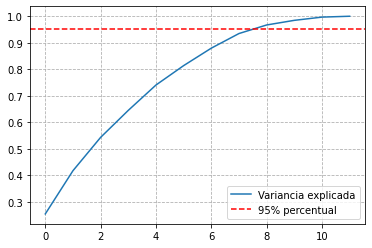

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA().fit(x_norm)
plt.plot(np.cumsum(pca.explained_variance_ratio_), label='Variancia explicada')
plt.axhline(0.95,color='red',linestyle='--',label='95% percentual')
plt.grid(True, linestyle='--')
plt.legend()

<AxesSubplot:>

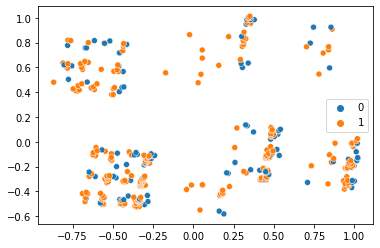

In [36]:
pca       = PCA(n_components=8)
dados_pca = pca.fit_transform(x_norm)
sns.scatterplot(x=dados_pca[:,0],y=dados_pca[:,1],hue=Y)

# Dividir bases de treinamento e de teste

In [38]:
from sklearn.model_selection import train_test_split
x_treino,x_teste,y_treino,y_teste = train_test_split(dados_pca,Y,test_size=0.2,random_state=99,shuffle=True)

# Salvar bases de dados

In [39]:
import pickle

In [58]:
with open('loan_status.pkl', mode = 'wb') as f:
    pickle.dump([x_treino,y_treino,x_teste,y_teste],f) 